# Load and Print all the accuracies of the 10 runs 10-fold cross-validation for nbc versus aode on each dataset

In [1]:
ClassID = readdlm("Data/ClassifierID.dat", ',')
ClassNames = readdlm("Data/ClassifierNames.dat", ',')
DatasetID = readdlm("Data/DatasetID.dat", ',');
DatasetNames = readdlm("Data/DatasetNames.dat", ',');
Percent_correct = readdlm("Data/Percent_correct.dat", ',');

i=1 #nbc
j=2 #aode
println("Accuracies for ", ClassNames[i,1], "(first row) and ", ClassNames[j,1], "(second row) on 10 runs of 10-fold cross-validation")
println()
println()

indi=find(x->x==i,ClassID)
indj=find(x->x==j,ClassID)
for d=1:Int32(maximum(DatasetID))
    indd=find(x->x==d,DatasetID)
    indid=intersect(indi,indd)
    indjd=intersect(indj,indd)
    acci=Percent_correct[indid]
    acci=round(acci,2)
    accj=Percent_correct[indjd]
    accj=round(accj,2)
    #Latex Formatted
    println("$(DatasetNames[d]) & $(acci[1])  & $(acci[2])  & $(acci[3])  & $(acci[4]) & \\dots & $(acci[end-1]) & $(acci[end])\\\\")
    println("$(DatasetNames[d]) & $(accj[1])  & $(accj[2])  & $(accj[3])  & $(accj[4]) & \\dots & $(accj[end-1]) & $(accj[end])\\\\")
    #if d==2
    #df= convert(DataFrame, acci')
    #    writetable("nbc_audiology.csv", df )
    #df=convert(DataFrame, accj')
    #writetable("aode_audiology.csv", df )
    #break
    #end
end


Accuracies for nbc(first row) and aode(second row) on 10 runs of 10-fold cross-validation


anneal & 94.44  & 98.89  & 94.44  & 98.89 & \dots & 94.38 & 97.75\\
anneal & 96.67  & 100.0  & 96.67  & 100.0 & \dots & 96.63 & 97.75\\
audiology & 73.91  & 69.56  & 73.91  & 60.87 & \dots & 72.73 & 59.09\\
audiology & 73.91  & 69.56  & 78.26  & 60.87 & \dots & 72.73 & 59.09\\
wisconsin-breast-cancer & 90.32  & 90.32  & 87.1  & 86.67 & \dots & 86.67 & 90.0\\
wisconsin-breast-cancer & 87.1  & 87.1  & 87.1  & 86.67 & \dots & 83.33 & 86.67\\
cmc & 51.35  & 50.68  & 54.73  & 59.18 & \dots & 50.34 & 48.3\\
cmc & 52.7  & 50.68  & 52.7  & 55.1 & \dots & 52.38 & 48.98\\
contact-lenses & 66.67  & 66.67  & 66.67  & 66.67 & \dots & 100.0 & 100.0\\
contact-lenses & 66.67  & 66.67  & 66.67  & 66.67 & \dots & 100.0 & 100.0\\
credit & 84.06  & 82.61  & 84.06  & 88.41 & \dots & 78.26 & 84.06\\
credit & 84.06  & 82.61  & 84.06  & 89.86 & \dots & 79.71 & 85.51\\
german-credit & 85.51  & 79.71  & 82.61  & 84.06 & 

# Hereafter we compute the $p$-values dataset-by-dataset by applying the frequentist correlated t-test

In [2]:
using Distributions
using DataFrames
include("Tests/ttest_correlated.jl")

#correlation for 10 runs 10 folds cross-validation
rho=1/10

#Classifiers
i=1 #nbc
j=2 #aode
println("two-sided p-values for ", ClassNames[i,1], " vs. ", ClassNames[j,1])
println()

indi=find(x->x==i,ClassID)
indj=find(x->x==j,ClassID)
pvalue=Float64[]
for d=1:Int32(maximum(DatasetID))
    indd=find(x->x==d,DatasetID)
    indid=intersect(indi,indd)
    indjd=intersect(indj,indd)
    acci=Percent_correct[indid]/100
    accj=Percent_correct[indjd]/100
    #return p-value and confidence interval
    p,ci=ttest_correlated(acci-accj,0,rho,0,0.05)
    push!(pvalue,p)   
    if mod(d,3)==0
        # Latex Formatted
        @printf "%s & %1.3f & %s & %1.3f & %s & %1.3f \\\\\n" DatasetNames[d-2] pvalue[d-2] DatasetNames[d-1] pvalue[d-1] DatasetNames[d] pvalue[d]   
    end
end


 



two-sided p-values for nbc vs. aode

anneal & 0.001 & audiology & 0.622 & wisconsin-breast-cancer & 0.598 \\
cmc & 0.338 & contact-lenses & 0.643 & credit & 0.479 \\
german-credit & 0.171 & pima-diabetes & 0.781 & ecoli & 0.001 \\
eucalyptus & 0.258 & glass & 0.162 & grub-damage & 0.090 \\
haberman & 0.671 & hayes-roth & 1.000 & cleeland-14 & 0.525 \\
hungarian-14 & 0.878 & hepatitis & 0.048 & hypothyroid & 0.287 \\
ionosphere & 0.684 & iris & 0.000 & kr-s-kp & 0.646 \\
labor & 1.000 & lier-disorders & 0.270 & lymphography & 0.018 \\
monks1 & 0.000 & monks3 & 0.220 & monks & 0.000 \\
mushroom & 0.000 & nursery & 0.000 & optdigits & 0.000 \\
page-blocks & 0.687 & pasture-production & 0.000 & pendigits & 0.452 \\
postoperatie & 0.582 & primary-tumor & 0.492 & segment & 0.000 \\
solar-flare-C & 0.035 & solar-flare-m & 0.596 & solar-flare-X & 0.004 \\
sonar & 0.777 & soybean & 0.049 & spambase & 0.000 \\
spect-reordered & 0.198 & splice & 0.004 & squash-stored & 0.940 \\
squash-unstored & 

# Piechart of the percentage of comparisons that are significant and non-significant

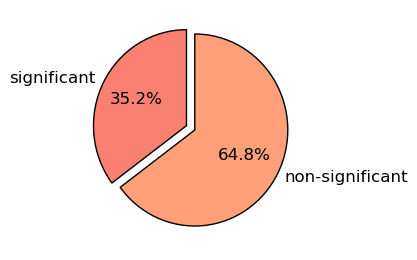

  likely near In[3]:25
  likely near In[3]:25


In [3]:
using PyPlot

res=find(x->x<0.05,pvalue)
labels = ["significant", "non-significant"]


colors = ["salmon","lightsalmon"]
sizes = NaN*zeros(2)
explode = zeros(length(sizes))
explode[1] = 0.1
sizes= [length(res)/length(pvalue)*100, (1-length(res)/length(pvalue))*100 ]

fig = figure("pyplot_piechart",figsize=(3,3))
    ax = fig[:add_subplot](1,1,1)
p,text,autotext=ax[:pie](sizes,
        labels=labels,
        shadow=false,
        startangle=90,
         colors=colors,
        explode=explode,
autopct="%1.1f%%")


io=open("Plots/piechart.pdf","w") 
writemime(io, "application/pdf", fig)

